[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 ...
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]]
[[[[227 226 232]
   [227 226 232]
   [227 226 232]
   ...
   [191 186 182]
   [191 186 182]
   [191 186 182]]

  [[227 226 232]
   [227 226 232]
   [227 226 232]
   ...
   [191 186 182]
   [191 186 182]
   [191 186 182]]

  [[227 226 232]
   [227 226 232]
   [227 226 232]
   ...
   [191 186 182]
   [191 186 182]
   [191 186 182]]

  ...

  [[116  87  80]
   [ 98  69  62]
   [ 80  53  46]
   ...
   [215 167 163]
   [215 167 163]
   [215 167 163]]

  [[115  86  80]
   [ 97  69  62]
   [ 80  55  48]
   ...
   [215 167 163]
   [215 167 163]
   [215 167 163]]

  [[115  86  80]
   [ 92  64  57]
   [ 84  58  51]
   ...
   [215 167 163]
   [215 167 163]
   [215 167 163]]]


 [[[225 215 214]
   [225 215 214]
   [225 215 214]
   ...
   [ 62  64  59]
   [ 64  66  61]
   [ 65  67  62]]

  [[225 215 214]
   [225 215 214]
   [225 215 214]
   ...
   [ 75  77  72]
   [ 76  78  73]
   [ 77  79  74]]

  [[225

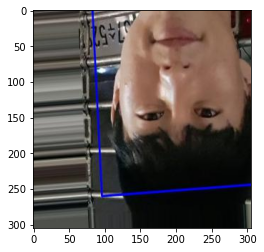

In [3]:
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob

#경로 수정해서 사용
data_dir = "C:/Users/his78/Downloads/this_is_real"
categories = ['bsb','chs','jhr','ksm','lgh','yc']

nb_class = len(categories)

image_w = 256
image_h = 256
pixel = image_w * image_h * 3

#x = image
#y = label
x = []
y = []

X_test_all = []
X_train_all = []
Y_test_all = []
Y_train_all = []


#여러 리스트를 합치고, np array 형태로 리턴 
def final(x):
    slist =[]
    
    for i in range(len(x)):
        for a in range(len(x[i])):
            slist.append(x[i][a])
            
    final  = np.array(slist)
    return final

        
# 리스트를 np.array로 바꾸고 shuffle 진행하는     
def np_shuffle(x,y):
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    
    x = x[s]
    y = y[s]
    
    return x,y


for idx,c in enumerate(categories):
    label = [0 for i in range(nb_class)]
    label[idx] = 1
    img_dir = data_dir + "/" + c
    files = glob.glob(img_dir + "/*.jpg")
    #print(files)
    
    for i,f in enumerate(files):
        img = Image.open(f)
        plt.imshow(img)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        x.append(data)
        y.append(label)
            #각 라벨 별 10장 중 랜덤으로 8:2 비율의 사진 선정 
    X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.2, train_size=0.8,shuffle = True)
    
    X_train_all.append(X_train)
    X_test_all.append(X_test)
    Y_train_all.append(Y_train)
    Y_test_all.append(Y_test)
     
  
    x.clear()
    y.clear()
    
    
x_train_arr = final(X_train_all)
y_train_arr = final(Y_train_all)
x_test_arr = final(X_test_all)
y_test_arr = final(Y_test_all)


x_train_final, y_train_final = np_shuffle(x_train_arr,y_train_arr)
x_test_final, y_test_final = np_shuffle(x_test_arr,y_test_arr)


print(y_test_final)
print(x_test_final)

image_data = (x_train_final, x_test_final, y_train_final, y_test_final)
#경로 수정해서 사용
np.save("C:/Users/his78/Downloads/facedata_test_final1.npy",image_data)
print('create npy file')
